In [1]:
mc.cores = parallel::detectCores()
#rstan_options(auto_write = TRUE)

library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


In [2]:
data(rugged)
d <- rugged
# make log version of outcome
d$log_gdp <- log( d$rgdppc_2000 )
# extract countries with GDP data
dd <- d[ complete.cases(d$rgdppc_2000) , ]
# rescale variables
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
# split countries into Africa and not-Africa
d.A1 <- dd[ dd$cont_africa==1 , ] # Africa
d.A0 <- dd[ dd$cont_africa==0 , ] # not Africa

In [3]:
m8.1 <- quap(
alist(
log_gdp_std ~ dnorm( mu , sigma ) ,
mu <- a + b*( rugged_std - 0.215 ) ,
a ~ dnorm( 1 , 1 ) ,
b ~ dnorm( 0 , 1 ) ,
sigma ~ dexp( 1 )
) , data=d.A1 )

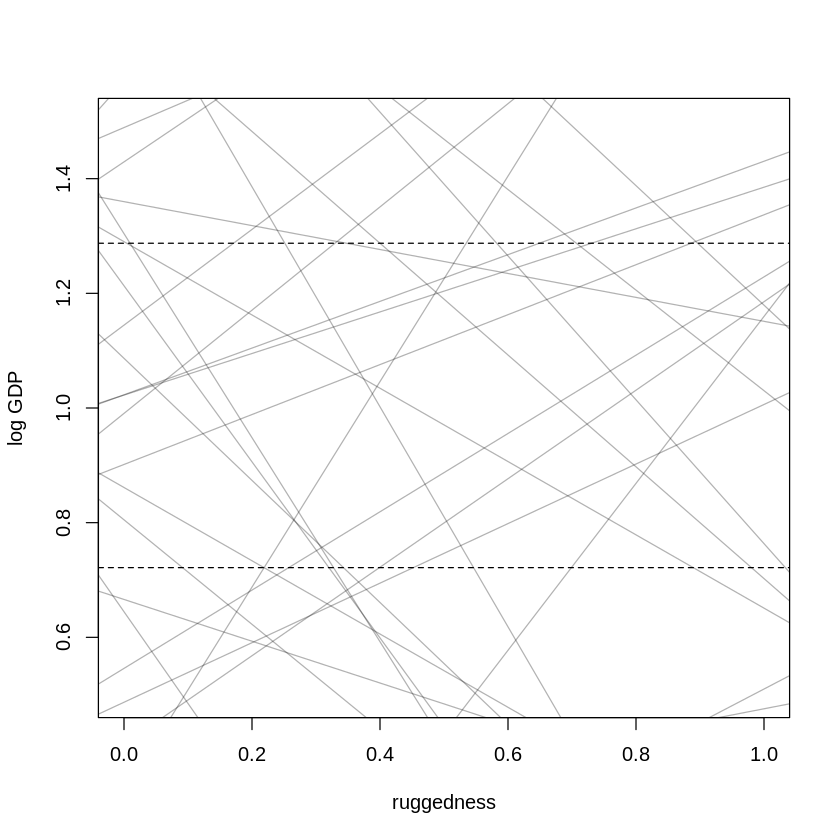

In [4]:
set.seed(7)
prior <- extract.prior( m8.1 )
# set up the plot dimensions
plot( NULL , xlim=c(0,1) , ylim=c(0.5,1.5) ,
xlab="ruggedness" , ylab="log GDP" )
abline( h=min(dd$log_gdp_std) , lty=2 )
abline( h=max(dd$log_gdp_std) , lty=2 )
# draw 50 lines from the prior
rugged_seq <- seq( from=-0.1 , to=1.1 , length.out=30 )
mu <- link( m8.1 , post=prior , data=data.frame(rugged_std=rugged_seq) )
for ( i in 1:50 ) lines( rugged_seq , mu[i,] , col=col.alpha("black",0.3) )

In [5]:
sum( abs(prior$b) > 0.6 ) / length(prior$b)

[1] 0.545

In [6]:
m8.1 <- quap(
alist(
log_gdp_std ~ dnorm( mu , sigma ) ,
mu <- a + b*( rugged_std - 0.215 ) ,
a ~ dnorm( 1 , 0.1 ) ,
b ~ dnorm( 0 , 0.3 ) ,
sigma ~ dexp(1)
) , data=d.A1 )

In [7]:
# Non-African nations
m8.2 <- quap(
alist(
log_gdp_std ~ dnorm( mu , sigma ) ,
mu <- a + b*( rugged_std - 0.215 ) ,
a ~ dnorm( 1 , 0.1 ) ,
b ~ dnorm( 0 , 0.25 ) ,
sigma ~ dexp(1)
) ,
data=d.A0 )

In [8]:
m8.3 <- quap(
alist(
log_gdp_std ~ dnorm( mu , sigma ) ,
mu <- a + b*( rugged_std - 0.215 ) ,
a ~ dnorm( 1 , 0.1 ) ,
b ~ dnorm( 0 , 0.3 ) ,
sigma ~ dexp( 1 )
) ,
data=dd )

In [9]:
# make variable to index Africa (1) or not (2)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

In [10]:
m8.4 <- quap(
alist(
log_gdp_std ~ dnorm( mu , sigma ) ,
mu <- a[cid] + b*( rugged_std - 0.215 ) ,
a[cid] ~ dnorm( 1 , 0.1 ) ,
b ~ dnorm( 0 , 0.3 ) ,
sigma ~ dexp( 1 )
) ,
data=dd )

In [11]:
dd

,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,⋯,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent,log_gdp,log_gdp_std,rugged_std,cid
,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670.0,-12.299,⋯,5.669,6.981,4.926,3.872,1223208,2.000,7.492609,0.8797119,0.1383424702,1
5,ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740.0,41.143,⋯,NA,NA,NA,NA,200000,100.000,8.216929,0.9647547,0.5525636891,2
8,ARE,784,United Arab Emirates,0.769,0.316,2.112,0.191,6.142,8360.0,23.913,⋯,NA,NA,NA,NA,19200,0.000,9.933263,1.1662705,0.1239922606,2
9,ARG,32,Argentina,0.775,0.220,2.268,0.226,9.407,273669.0,-35.396,⋯,NA,NA,NA,NA,276632,89.889,9.407032,1.1044854,0.1249596904,2
10,ARM,51,Armenia,2.688,0.934,8.178,0.799,50.556,2820.0,40.294,⋯,NA,NA,NA,NA,105743,0.500,7.792343,0.9149038,0.4334085779,2
12,ATG,28,Antigua and Barbuda,0.006,0.003,0.012,0.003,0.000,44.0,17.271,⋯,NA,NA,NA,NA,747,NA,9.212541,1.0816501,0.0009674299,2
13,AUS,36,Australia,0.143,0.183,0.405,0.045,0.685,768230.0,-25.733,⋯,NA,NA,NA,NA,200000,89.954,10.143191,1.1909183,0.0230570784,2
14,AUT,40,Austria,3.513,1.152,11.095,1.008,54.307,8245.0,47.589,⋯,NA,NA,NA,NA,1250000,98.400,10.274632,1.2063508,0.5664301838,2
15,AZE,31,Azerbaijan,1.672,0.534,5.080,0.490,27.713,8260.5,40.288,⋯,NA,NA,NA,NA,226250,4.000,7.852028,0.9219115,0.2695904547,2


In [12]:
compare( m8.3 , m8.4 )

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.4,-252.2793,4.251978,0.0000,1.000000e+00,15.29497,NA
m8.3,-188.7519,2.693455,63.5274,1.603984e-14,13.28923,15.14053


In [13]:
precis( m8.4 , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.88041473,0.015943392,0.8549341,0.90589535
a[2],1.04915430,0.010189703,1.0328692,1.06543941
b,-0.04668912,0.045704973,-0.1197345,0.02635625
sigma,0.11243357,0.006097339,0.1026888,0.12217830


In [14]:
rugged.seq <- seq( from=-0.1 , to=1.1 , length.out=30 )
# compute mu over samples, fixing cid=2
mu.NotAfrica <- link( m8.4 , data=data.frame( cid=2 , rugged_std=rugged.seq ) )
# compute mu over samples, fixing cid=1
mu.Africa <- link( m8.4 , data=data.frame( cid=1 , rugged_std=rugged.seq ) )
# summarize to means and intervals
mu.NotAfrica_mu <- apply( mu.NotAfrica, 2 , mean )
mu.NotAfrica_ci <- apply( mu.NotAfrica, 2 , PI , prob=0.97 )
mu.Africa_mu <- apply( mu.Africa , 2 , mean )
mu.Africa_ci <- apply( mu.Africa , 2 , PI , prob=0.97 )

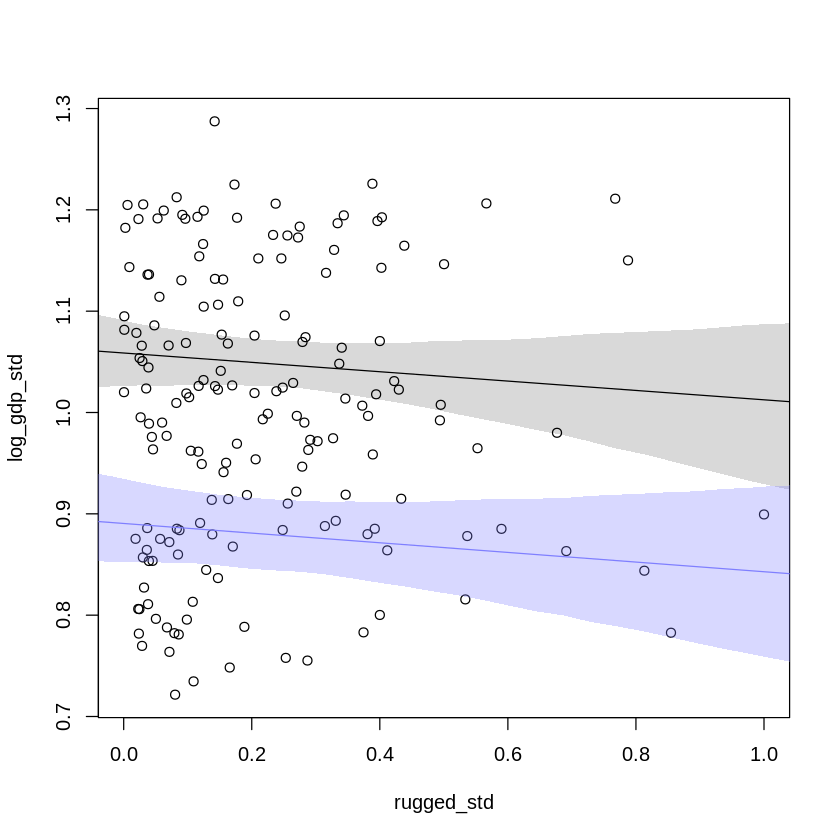

In [15]:
plot( log_gdp_std ~ rugged_std , data=dd )
lines( rugged.seq , mu.NotAfrica_mu )
shade( mu.NotAfrica_ci , rugged.seq )
lines( rugged.seq , mu.Africa_mu, col=col.alpha(rangi2,1) )
shade( mu.Africa_ci , rugged.seq, col=col.alpha(rangi2,0.3) )

In [16]:
m8.5 <- quap(
alist(
log_gdp_std ~ dnorm( mu, sigma ) ,
mu <- a[cid] + b[cid]*(rugged_std - 0.215 ) ,
a[cid] ~ dnorm( 1 , 0.1),
b[cid] ~ dnorm( 0 , 0.3),
sigma ~ dexp( 1 )
) ,
data=dd )

In [17]:
precis( m8.5 , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8865644,0.015675083,0.86151262,0.91161624
a[2],1.0505641,0.009936215,1.03468415,1.06644413
b[1],0.1325049,0.074201648,0.01391632,0.25109345
b[2],-0.1425769,0.054747277,-0.23007367,-0.05508023
sigma,0.1094897,0.005934704,0.10000492,0.11897452


In [18]:
compare( m8.3 , m8.4 , m8.5 )

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.5,-258.2581,5.608769,0.000000,9.544522e-01,15.26863,NA
m8.4,-252.1734,4.288529,6.084752,4.554778e-02,15.29425,6.764469
m8.3,-188.9108,2.616449,69.347319,8.340176e-16,13.34484,15.593212


In [19]:
compare( m8.3 , m8.4 , m8.5, func=LOO )

Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”

,LOO,pLOO,dLOO,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.5,-258.3727,5.560044,0.000000,9.554791e-01,15.33201,NA
m8.4,-252.2402,4.257522,6.132507,4.452092e-02,15.36266,6.77359
m8.3,-188.7397,2.697991,69.633013,7.237764e-16,13.29507,15.55168


In [20]:
waic_list <- WAIC( m8.5 , pointwise=TRUE )

In [21]:
waic_list

[1] -2.5634023 -2.4216874 -1.6833583 -2.4341677 -1.6214590 -2.5656840
  [7] -1.4739894  1.1471631 -1.3341745 -0.8537503 -1.1958250 -2.2886012
 [13] -2.3165912  1.6037015 -2.5197804 -2.2603465 -2.2191242 -2.5327949
 [19] -1.9937779 -2.3758391 -0.7170846 -2.4873571 -2.1392908  0.5548390
 [25] -2.4461972 -1.0114408  2.7625337 -2.3939498 -2.2003834 -2.5543462
 [31] -2.5380013 -1.6282466 -2.2845816 -2.4743903 -2.2777119 -1.8688785
 [37] -2.4956716 -0.7596746 -2.1525157 -1.2743056 -2.4946991 -2.2485004
 [43] -1.1541935 -2.5606286 -0.8589808 -1.7625408 -1.9018259 -1.4755765
 [49] -1.1491696 -2.5678788 -1.0285517 -1.3851696 -2.3632500 -1.0107382
 [55] -0.3037344 -1.2051585 -1.4273007 -2.5098178 -2.5384630 -2.5496024
 [61] -1.9161212  3.3690273 -0.9692705 -2.5583991 -2.1982502 -1.7352624
 [67] -0.1464847 -1.4836871 -2.5320612 -0.7162398 -2.4284561 -1.3979616
 [73] -0.8301234 -0.8314402 -2.5668737 -0.4510302 -0.8920567 -0.2825412
 [79] -2.0710487 -1.9391293 -0.3455758 -1.9921719 -2.2610379 -1.2170169
 [85]  0.3525140 -2.5487785 -1.7098851 -2.2550306 -0.4018190 -2.5221454
 [91] -2.5460128 -1.6561692 -1.2584131 -2.5582754  1.7991109 -2.5203126
 [97] -1.8945251 -2.3354590  1.5018309 -1.8001680 -2.5131488 -2.5681397
[103] -2.0027868 -1.6362634  0.4760856 -2.0699193 -2.5335238  0.8402448
[109] -1.0775675 -2.5698179 -0.7582484 -1.1572122 -1.8134190 -2.1505880
[115] -1.5877301 -1.2350270  0.8348178 -1.0836890 -1.2373858 -2.3340667
[121] -0.6938247 -2.5398227 -2.3028553 -2.2670733 -1.0374834 -2.5590512
[127] -1.2146094 -1.7246054 -1.9322538 -0.5936168 -2.4865713 -2.5483468
[133] -1.3575211 -2.3981198 -2.5572796 -2.5461766 -1.6816424 -0.3493343
[139] -0.6876294 -2.3559741 -2.3674085 -1.3769070 -1.1787244 -2.0930693
[145]  1.2663216 -1.4585291 -2.0167726 -2.5458828 -2.4999427  0.5321846
[151] -1.5192661 -2.4926382 -2.5746010 -0.5562491 -2.5618253 -0.9249602
[157] -2.4207444 -1.8099599 -2.5705528 -0.1749552  1.1820904 -2.5590532
[163] -2.3496309 -0.8781420 -1.8107367 -2.3972159  2.6045503  0.2054572
[169] -1.8845930 -2.4607730
attr(,"lppd")
  [1]  1.28460269  1.21772944  0.85096493  1.22062438  0.82791034  1.28556363
  [7]  0.75726517 -0.41719379  0.67706055  0.47027304  0.61823468  1.15519779
 [13]  1.16787779 -0.69813857  1.26262018  1.13702286  1.11806140  1.26938199
 [19]  1.00752032  1.19179167  0.37898796  1.24712479  1.07448569 -0.16357626
 [25]  1.22934606  0.52232919 -0.92413432  1.20153844  1.10450544  1.28030526
 [31]  1.27233758  0.83902786  1.15323344  1.24015937  1.15891398  0.96028786
 [37]  1.25097823  0.41649046  1.08125777  0.65288190  1.25222276  1.13183976
 [43]  0.60232438  1.28298314  0.47542809  0.88750618  0.96646610  0.78096913
 [49]  0.58652720  1.28663164  0.54909093  0.71101054  1.18476272  0.51880445
 [55]  0.22774149  0.61966043  0.75890630  1.25900881  1.27249167  1.27797283
 [61]  0.97544281 -1.46689331  0.52867065  1.28196817  1.10329214  0.88122318
 [67]  0.11684826  0.75383250  1.26883615  0.38465460  1.21858711  0.70960722
 [73]  0.43196812  0.43933889  1.28618026  0.24465141  0.46088230  0.18032217
 [79]  1.04034053  0.97502469  0.20163069  1.00496631  1.13939060  0.68800803
 [85] -0.12758498  1.27748549  0.86332444  1.13436343  0.23873232  1.26529799
 [91]  1.27583351  0.83861077  0.89679357  1.28187144 -0.83125823  1.26330374
 [97]  0.95490781  1.17807017 -0.68217832  0.91611284  1.25945345  1.28681218
[103]  1.02049644  0.82529878 -0.20000985  1.04797611  1.27036155 -0.33049548
[109]  0.56978889  1.28760248  0.42027566  0.58998608  0.93089311  1.08866591
[115]  0.80248906  0.64475054 -0.35291012  0.66949053  0.63271928  1.17062649
[121]  0.36652461  1.27260857  1.15477279  1.13783926  0.53140329  1.28238985
[127]  0.61782473  0.86884307  0.97695683  0.32029212  1.24608184  1.27685367
[133]  0.76184069  1.20260924  1.28167120  1.27651778  0.85944882  0.19585724
[139]  0.39250016  1.18134710  1.18701803  0.70727068  0.60467935  1.07514114
[145] -0.05128488  0.74105163  1.02410800  1.27637369  1.25277257  0.040

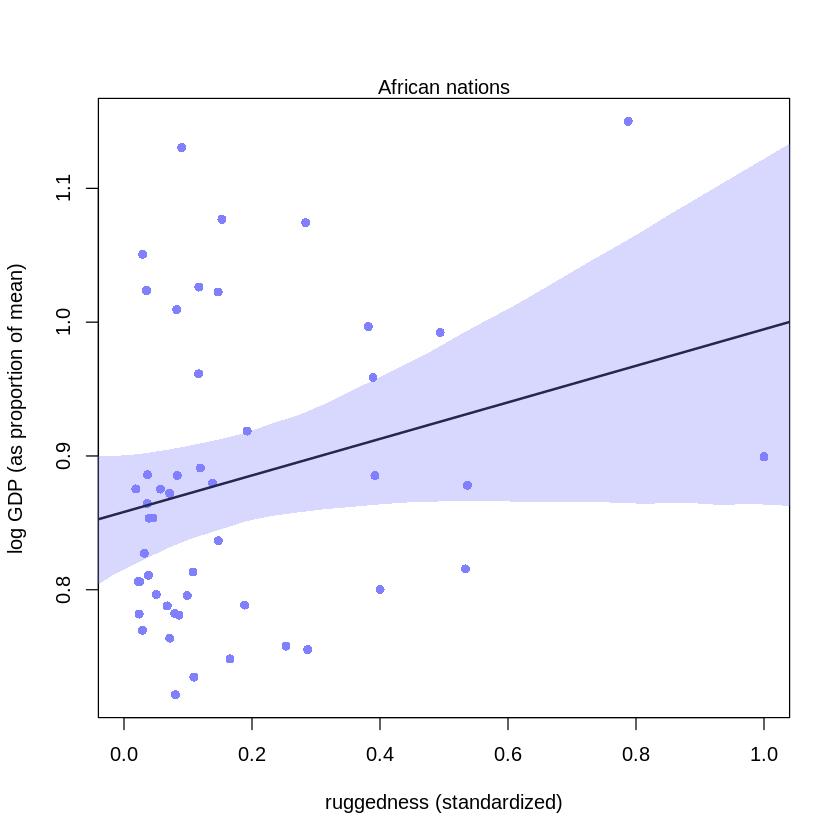

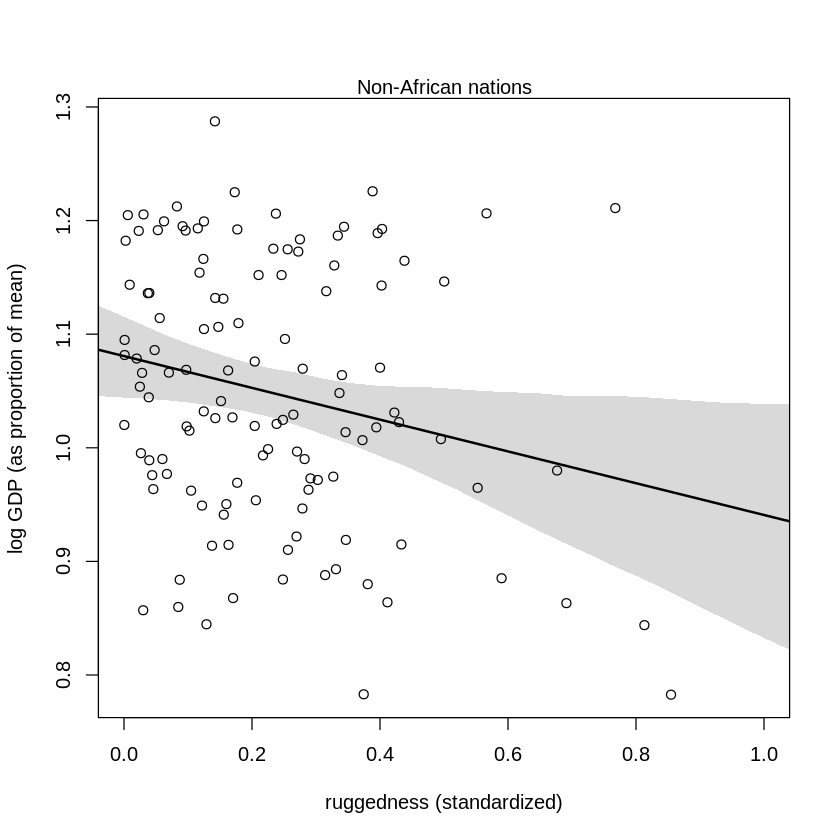

In [22]:
# plot Africa - cid=1
plot( d.A1$rugged_std , d.A1$log_gdp_std , pch=16 , col=rangi2 ,
xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
xlim=c(0,1) )
mu <- link( m8.5 , data=data.frame( cid=1 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq , col=col.alpha(rangi2,0.3) )
mtext("African nations")

# plot non-Africa - cid=2
plot( d.A0$rugged_std , d.A0$log_gdp_std , pch=1 , col="black" ,
xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
xlim=c(0,1) )
mu <- link( m8.5 , data=data.frame( cid=2 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq )
mtext("Non-African nations")

In [23]:
rugged_seq <- seq(from=-0.2,to=1.2,length.out=30)
muA <- link( m8.5 , data=data.frame(cid=1,rugged_std=rugged_seq) )
muN <- link( m8.5 , data=data.frame(cid=2,rugged_std=rugged_seq) )
delta <- muA - muN

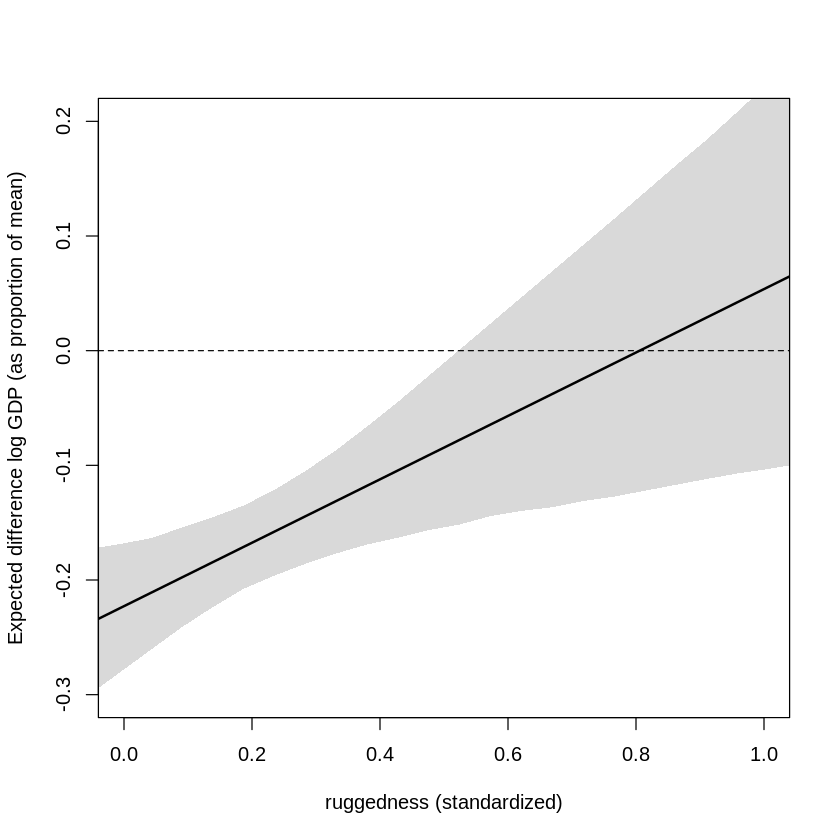

In [24]:
plot( NULL , xlim=c(0,1) , ylim=c(-0.3,0.2) ,
xlab="ruggedness (standardized)" , ylab="Expected difference log GDP (as proportion of mean)" )
delta_mean <- apply( delta , 2 , mean )
delta_ci <- apply( delta , 2 , PI , prob=0.97 )
lines( rugged_seq , delta_mean , lwd=2 )
shade( delta_ci , rugged_seq )
abline( h=0 , lty=2 )

In [25]:
library(rethinking)
data(tulips)
d <- tulips
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [26]:
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

In [27]:
a <- rnorm( 1e4 , 0.5 , 1 )
sum( a < 0 | a > 1 ) / length( a )

[1] 0.6154

In [28]:
a <- rnorm( 1e4 , 0.5 , 0.25 )
sum( a < 0 | a > 1 ) / length( a )

[1] 0.0484

In [29]:
m8.6 <- quap(
alist(
blooms_std ~ dnorm( mu , sigma ) ,
mu <- a + bw*water_cent + bs*shade_cent ,
a ~ dnorm( 0.5 , 0.25 ) ,
bw ~ dnorm( 0 , 0.25 ) ,
bs ~ dnorm( 0 , 0.25 ) ,
sigma ~ dexp( 1 )
) ,
data=d )

In [30]:
m8.7 <- quap(
alist(
blooms_std ~ dnorm( mu , sigma ) ,
mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent ,
a ~ dnorm( 0.5 , 0.25 ) ,
bw ~ dnorm( 0 , 0.25 ) ,
bs ~ dnorm( 0 , 0.25 ) ,
bws ~ dnorm( 0 , 0.25 ) ,
sigma ~ dexp( 1 )
) ,
data=d )

[1]  1  4  7 10 13 16 19 22 25
[1]  2  5  8 11 14 17 20 23 26
[1]  3  6  9 12 15 18 21 24 27


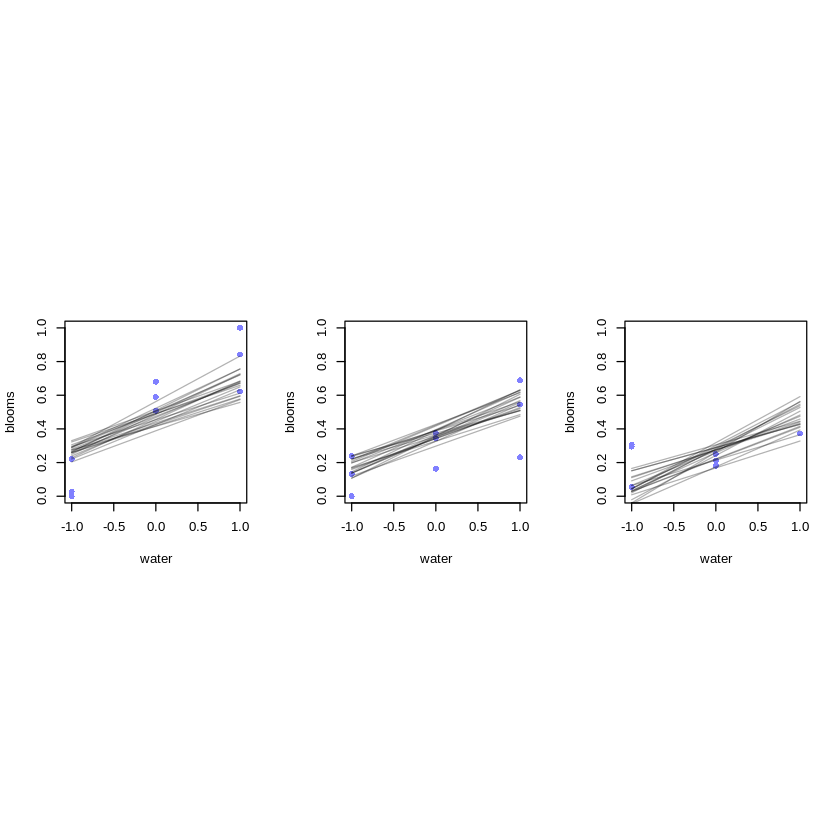

In [31]:
par(mfrow=c(1,3), pty = "s") # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    print(idx)
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
    xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.6 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

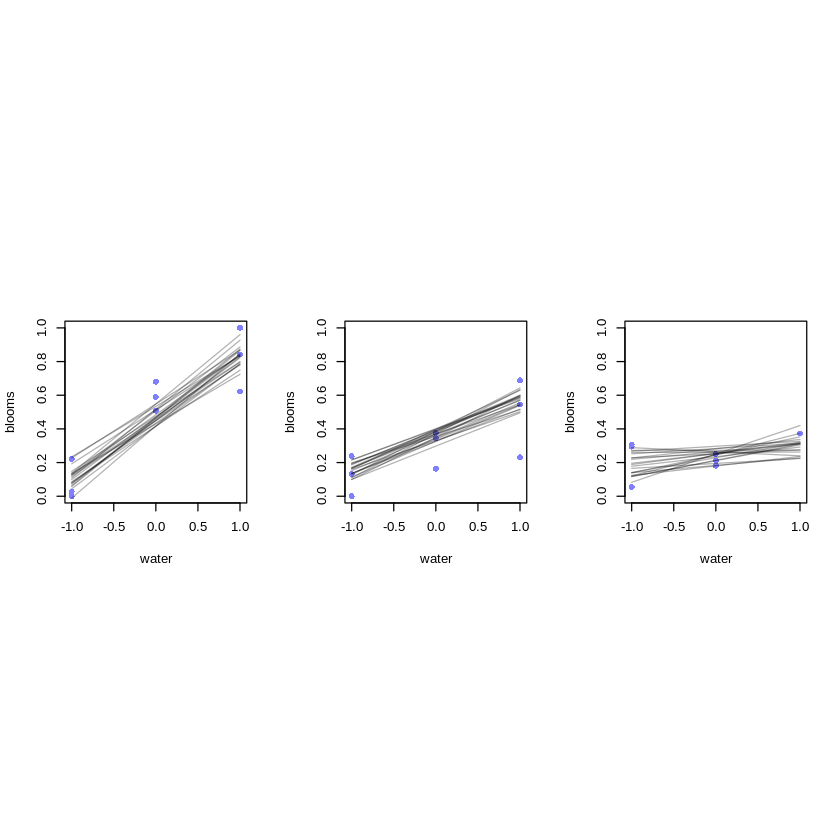

In [32]:
par(mfrow=c(1,3), pty='s') # 3 plots in 1 row
for ( s in -1:1 ) {
idx <- which( d$shade_cent==s )
plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
mu <- link( m8.7 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

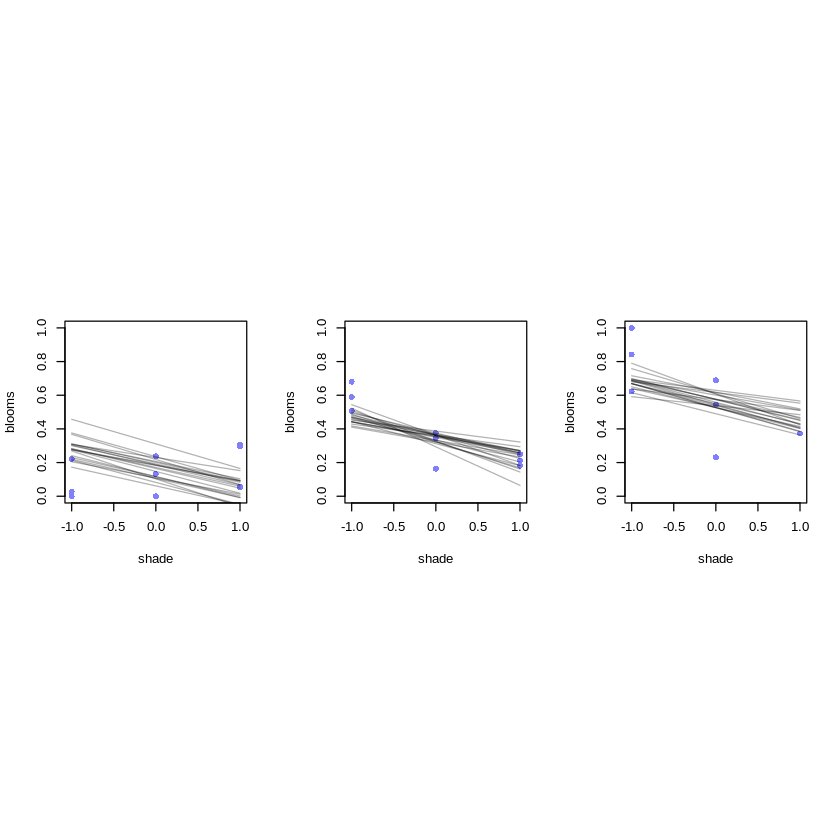

In [33]:
par(mfrow=c(1,3), pty = "s") # 3 plots in 1 row
for ( w in -1:1 ) {
    idx <- which( d$water_cent==w )
    plot( d$shade_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
    xlab="shade" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.6 , data=data.frame( shade_cent=-1:1 , water_cent=w ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

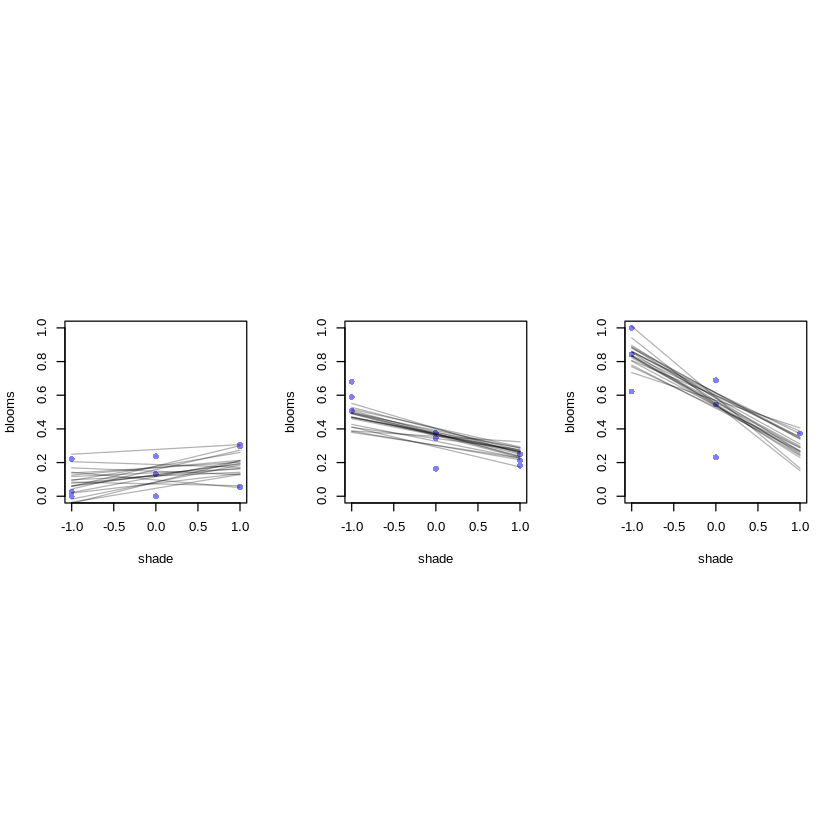

In [34]:
par(mfrow=c(1,3), pty = "s") # 3 plots in 1 row
for ( w in -1:1 ) {
    idx <- which( d$water_cent==w )
    plot( d$shade_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
    xlab="shade" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.7 , data=data.frame( shade_cent=-1:1 , water_cent=w ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

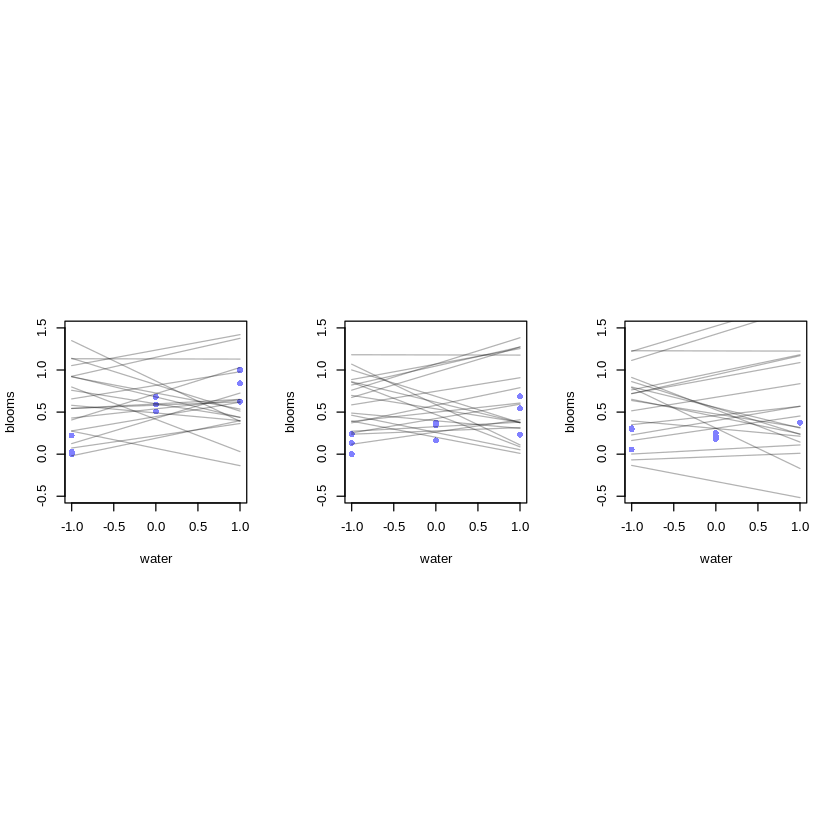

In [35]:
set.seed(7)
prior <- extract.prior(m8.6)

par(mfrow=c(1,3), pty = "s") # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(-0.5,1.5) ,
    xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.6 , post=prior, data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

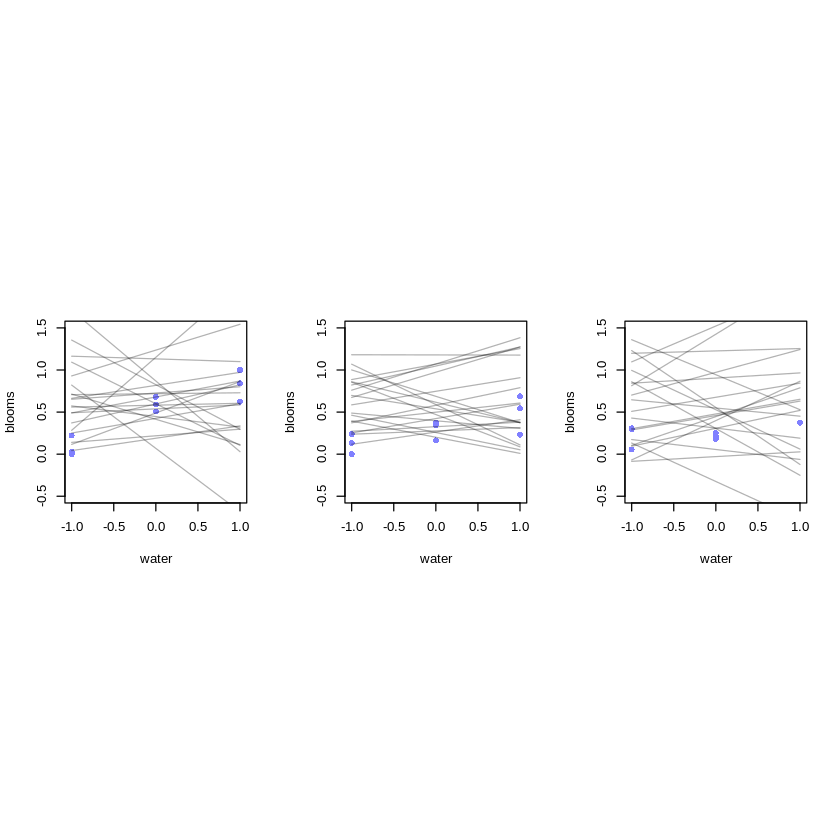

In [36]:
set.seed(7)
prior <- extract.prior(m8.7)

par(mfrow=c(1,3), pty = "s") # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(-0.5,1.5) ,
    xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.7 , post=prior, data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

Practice

7E1. For each of the causal relationships below, name a hypothetical third variable that would lead
to an interaction effect.
(1) Bread dough rises because of yeast.

HEAT: Low heat reduces or prevents the rising

(2) Education leads to higher income.

EMPLOYMENT

(3) Gasoline makes a car go.

CAR BATTERY, DRIVER.

7E2. Which of the following explanations invokes an interaction?
(1) Caramelizing onions requires cooking over low heat and making sure the onions do not
dry out.
(2) A car will go faster when it has more cylinders or when it has a better fuel injector.
(3) Most people acquire their political beliefs from their parents, unless they get them instead
from their friends.
(4) Intelligent animal species tend to be either highly social or have manipulative appendages
(hands, tentacles, etc.).


1 View as binary variables: Caramelized Onions is output, 1 means true (as in, we made them), and 0 means false (as in, we failed to make them).  Predictors: Low heat (1=true, 0=false), i.e. false means high heat or no heat..., Moistness (0=false, they dried out, 1=true, they didn't dry out).

2 Does fuel injector increase impact of adding an extra cylinder?  I don't know my car mechanics, but if it does there is an interaction term.  If not, then there is no interaction term, and the model can be made from a normal linear 2-predictor model with no interaction term.

3 Isn't this just a simple Bernoulli random variable (e.g. coin toss), with prob p of having same political belief as parents, friends or neither?

4  The way this is phrased, I think it doesn't imply an interaction term.  However, if we stop and think about nature, I imagine it could be necessary to model this with an interaction term.  Compare humans and dolphins.  Both have similar magnitudes of intelligence, however only humans have manipulative appendages, or at least, humans have MORE manipulative appendages than dolphins.  Just observing these two species, humans live in far more complex societies.  So the association between intelligence and the predictors of social complexity and manipulative appendages may be cross-dependent on each other.

Compare with Africa GDP ruggedness models.  Imagine intelligence is continuous output (if we can somehow measure this).  Does having manipulative appendages (binary variable - true /false) affect the association (slope) of intelligence with social complexity of the species?  Or, symmetrically, does living in a more complex society affect the association (slope) of intelligence with having manipulative appendages?  I.e. for a species in a similarly socially complex group, does having manipulative appendages indicate a different change (e.g increase) in intelligence for a small change in social complexity?  Without knowledge of the field, I imagine it is possible.

7E3

(1) Inclusive OR.
Caramelized Onions ~ logit or probit (alpha + beta_H*Heat + beta_D*Dryness + beta_HD * (Heat * Dryness))

(2) No interaction term needed:
Car Speed ~ alpha + beta1 * (Number of Cylinders) + beta2 * (Quality of Fuel Injector)

(3)
Political Beliefs ~ Indicator[Beliefs got from friends] * Friends' Beliefs + 
                    (1-Indicator[Beliefs got from friends]) * Parents' Beliefs
                    
(4) Seems to imply Exclusive OR:
Intelligence ~ alpha[Indicator of Manipulative Appendages] + beta[Indicator of Manipulative Appendages] * (Social Complexity)




7M1  The presence of High Temperature would have to negate the effects of water and shade, making beta_W and beta_S and beta_WS tend to 0.  

We can express the model with the following equations:

Bloom[i] ~ alpha + gamma_W[i] * W[i] + gamma_S[i] * S[i] + gamma_H[i] * H[i]

where

gamma_W[i] = beta_W + beta_WS * S[i] + beta_WH * H[i] + beta_WSH * S[i] * H[i]

gamma_S[i] = beta_S + beta_SW * W[i] + beta_SH * H[i] + beta_SHW * H[i] * W[i]

gamma_H[i] = beta_H + beta_HS * S[i] + beta_HW * W[i] + beta_HWS * S[i] * W[i]

So when H[i] = 1:

gamma_W[i] = 0 = beta_W + beta_WS * S[i] + beta_WH  + beta_WSH * S[i]

gamma_S[i] = 0 = beta_S + beta_SW * W[i] + beta_SH  + beta_SHW * W[i]

and:

Bloom[i] ~ alpha + gamma_W[i] * W[i] + gamma_S[i] * S[i] + gamma_H[i] = alpha + gamma_H[i]

Therefore:

gamma_H[i] = -alpha


7M2

From https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch07_hw.R, we can simply have:

bloom ~ is_temp_cold * (a + bW*w + bS*s + bWS*w*s)

Otherwise, my more complicated answer:

As in the chapter, but with H = 1 for High Temperature, H = 0 for Cold.

Bloom ~ alpha + beta_W * W + beta_S * S + beta_H * H + beta_WS * W * S + beta_WH * W * H + beta_SH * S * H + beta_WSH * W * S * H

Set Bloom = 0 when H = 1, so:

0 = alpha + beta_W * W + beta_S * S + beta_H + beta_WS * W * S + beta_WH * W + beta_SH * S + beta_WSH * W * S

  = alpha + (beta_W + beta_WH) * W + (beta_S + beta_SH) * S + (beta_WS + beta_WSH) * W * S
  
  
A clear explanation is given in https://jmgirard.com/statistical-rethinking-ch7/. which we also follow below:

Check when the predictors are as follows.

Check equation when all predictors are 1. The predictors drop out like:

0 = alpha + beta_W + beta_S + beta_H + beta_WS + beta_WH + beta_SH + beta_WSH



For H = 1, S = 0, W = 0:

0 = alpha + beta_H

Thus, alpha = -beta_H


Also, for H = 1, S = 1, W = 0:

0 = alpha + beta_S + beta_H + beta_SH 

Combine this with the first constraint, we have:

0 = beta_S + beta_SH

Thus,

beta_SH = -beta_S

By symmetry, we must also have

beta_WH = -beta_W



For H = 1, S = -1, W = -1:

0 = alpha -beta_W - beta_S + beta_H

Thus

0 = beta_W + beta_S

Thus:

beta_W = -beta_S

When H = 0, the main equation:

Bloom ~ alpha + beta_W * W + beta_S * S + beta_H * H + beta_WS * W * S + beta_WH * W * H + beta_SH * S * H + beta_WSH * W * S * H

becomes:

Bloom ~ alpha + beta_W * W + beta_S * S + beta_WS * W * S

i.e. the original interaction model without the heat term.

7M3

Raven Population ~ alpha + beta_F * Food + beta_W * Wolves + beta_FW * (Food * Wolves)

"Would the relationship be linear?"  The relationship between what?  Raven Population and Wolves?  No the relationship would be non-linear, because imagine there is a constant amount of food.  Consider we vary the population of wolves from 0 upwards.  From 0, there are no wolves to kill and open up food for ravens, so ravens will not be supported (would starve to death).  As we increase the number of wolves, more and more food is killed and more food is available to raven populations, thus supporting an increasing number of ravens.  The relationship up to here may be somewhat linear.  However, above a certain threshold population of wolves, there is not enough food available for the wolves to be able to share with ravens.  Therefore it would be likely that the wolves would stop tolerating the ravens sharing their food source.  Thus, the ravens - all else being equal - would decline in number.  Of course, realistically, for a constant supply of food, there would exist a maximum sustainable number of wolves - any more would just die from hunger, so that may keep the number of wolves in check.

Let's simulate the data generating process:

In [37]:
#Assume equal area units, or values per unit area.
#Consider standardizd variables, but want to keep 0 as boundary value.  So divide by max to get population variables between 0 and 1. variables

N <- 1e4  #samples corresponding to N area units
p <- runif(N,0,1)   #prey in each area unit, uniformly distributed between 0 and 1
w <- rnorm(N,p,0.1)    #wolves in each unit are normally distributed with mean equal to number of prey, but positive.
w[which(w<0)] <- 0    #scale so that wolves are between 0 and 1.   Do the [0,1] constraints unfairly it distort the distribution?
w <- w/max(w)
r <- rnorm(N,w,0.1)
r[which(r<0)] <- 0 
r <- r/max(r)

d = data.frame(p=p, w=w, r=r)

In [38]:
head(d)

p,w,r
<dbl>,<dbl>,<dbl>
0.9179601,0.74504858,0.7022447
0.6705428,0.63501327,0.4371504
0.1136216,0.06118238,0.0000000
0.7028956,0.44750014,0.4897285
0.9442057,0.71268192,0.6459085
0.4482861,0.28385731,0.2118951


In [39]:
m_raven <- quap(
alist(
r ~ dnorm( mu , sigma ) ,
mu <- a + b_p*p + b_w*w + b_pw*p*w,
a ~ dnorm( 0 , 0.2 ) ,
b_p ~ dnorm( 0 , 0.5 ) ,
b_w ~ dnorm( 0 , 0.5 ) ,
b_pw ~ dnorm( 0 , 0.5 ) ,
sigma ~ dunif( 0, 1 )
) , data=d )

In [40]:
precis(m_raven)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.02218500,0.002526861,0.01814659,0.026223412
b_p,-0.01769188,0.010327464,-0.03419716,-0.001186594
b_w,0.80171057,0.013300731,0.78045343,0.822967709
b_pw,0.07263825,0.013842534,0.05051521,0.094761293
sigma,0.08464635,0.000598270,0.08369020,0.085602499


7H1

In [41]:
library(rethinking)
data(tulips)
d <- tulips
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [42]:
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

Define 'bid' variable which is bed id.

In [43]:
a <- which(d$bed=='a')
b <- which(d$bed=='b')
c <- which(d$bed=='c')

d$bid[a] <- 1
d$bid[b] <- 2
d$bid[c] <- 3

In [44]:
m_8H1 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a[bid] + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent ,
        a[bid] ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d 
)

In [45]:
precis(m_8H1, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.2732600,0.03571818,0.21617543,0.33034452
a[2],0.3964039,0.03570079,0.33934718,0.45346068
a[3],0.4090940,0.03569964,0.35203904,0.46614887
bw,0.2074500,0.02537719,0.16689232,0.24800761
bs,-0.1138442,0.02537265,-0.15439460,-0.07329381
bws,-0.1438925,0.03099868,-0.19343440,-0.09435066
sigma,0.1081971,0.01469773,0.08470727,0.13168688


7H2

In [46]:
compare(m8.7, m_8H1)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_8H1,-23.90973,9.473248,0.000000,0.825147,9.812698,NA
m8.7,-20.80650,7.241714,3.103232,0.174853,11.177712,8.494469


As expected, model m_8H1 has a lower WAIC, with a pWAIC (effective parameters) value approximately 3 units higher.  However, the WAIC cannot really distinguish one model better for prediction than the other, as the dSE (standard error of the difference between the models) has a value of almost 8, much greater than the dWAIC difference between the models of 1.3.  Two-thirds of the weight is given to m_8H1, so the beds had a significant influence on the bloom outcomes.  For example, a[1] is much lower than a[2] and a[3], so would be useful for predicting new samples within the same space of beds.

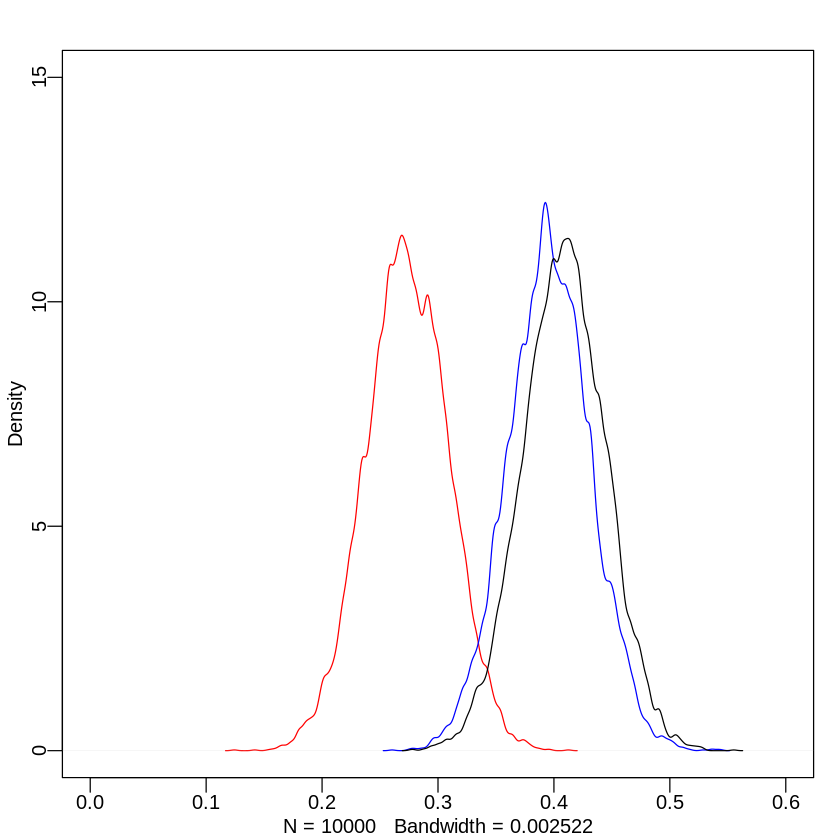

In [47]:
post <- extract.samples(m_8H1)
post.a <- post$a[,1]
post.b <- post$a[,2]
post.c <- post$a[,3]

dens(post.a, col = "red", xlim = c(0, 0.6), ylim = c(0, 15))
dens(post.b, col = "blue", add = TRUE)
dens(post.c, col = "black", add = TRUE)

7H3

In [48]:
library(rethinking)
data(rugged)
d <- rugged

# make log version of outcome
d$log_gdp <- log( d$rgdppc_2000 )
# extract countries with GDP data
dd <- d[ complete.cases(d$rgdppc_2000) , ]
# rescale variables
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
#dd$rugged_std_cent <- dd$rugged_std - mean(dd$rugged_std)

# split countries into Africa and not-Africa
#d.A1 <- dd[ dd$cont_africa==1 , ] # Africa
#d.A0 <- dd[ dd$cont_africa==0 , ] # not Africa

# make variable to index Africa (1) or not (2)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

In [49]:
#noSeychelles <- which(dd$country!='Seychelles')
#dd_noSey <- dd[noSeychelles,]
dd_noSey <- dd[dd$country!='Seychelles',]

Given the advice in the 2nd edition of the Statistical Rethinking book and lectures, we change the model slightly from the original question, by using index variables instead of dummy variables.  This is recommended by McElreath, because it treats all cases of the index equally, whereas by using dummy variables, one is implicitly stating that the prior uncertainty of the different cases is different.

In [50]:
m_all <- quap(
            alist(            
                log_gdp_std ~ dnorm(mu, sigma),
                mu <- a[cid] + bR[cid] * (rugged_std - mean(dd$rugged_std)),
                a[cid] ~ dnorm(1, 0.2),
                bR[cid] ~ dnorm(0,0.3),
                sigma ~ dexp(1)
            ),
            data=dd)

precis(m_all, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8844319,0.015816668,0.85915380,0.9097100
a[2],1.0509530,0.009971917,1.03501591,1.0668900
bR[1],0.1308258,0.074213579,0.01221818,0.2494335
bR[2],-0.1427419,0.054741529,-0.23022947,-0.0552544
sigma,0.1094755,0.005932547,0.09999416,0.1189569


In [51]:
m_noSey <- quap(
            alist(
                log_gdp_std ~ dnorm(mu, sigma),
                mu <- a[cid] + bR[cid] * (rugged_std - mean(dd_noSey$rugged_std)),
                a[cid] ~ dnorm(1, 0.2),
                bR[cid] ~ dnorm(0,0.3),
                sigma ~ dexp(1)
            ),
            data=dd_noSey)

precis(m_noSey, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.87707070,0.016051141,0.85141788,0.90272353
a[2],1.05143842,0.009910774,1.03559908,1.06727775
bR[1],0.06499607,0.081049110,-0.06453606,0.19452821
bR[2],-0.14275757,0.054328744,-0.22958540,-0.05592975
sigma,0.10862226,0.005904037,0.09918647,0.11805805


Note that now the mean bR coefficient for african countries has halved in magnitude and bR[1] has a 89% credible interval that covers 0 and negative values, so it could be that removing Seychelles is enough to remove the positive relationship between gdp and ruggedness.  However, bR still appears to be determined by continent (or at least, African / non-Africa status), with only a very small amount of overlap in the credible intervals of bR[1] and bR[2].

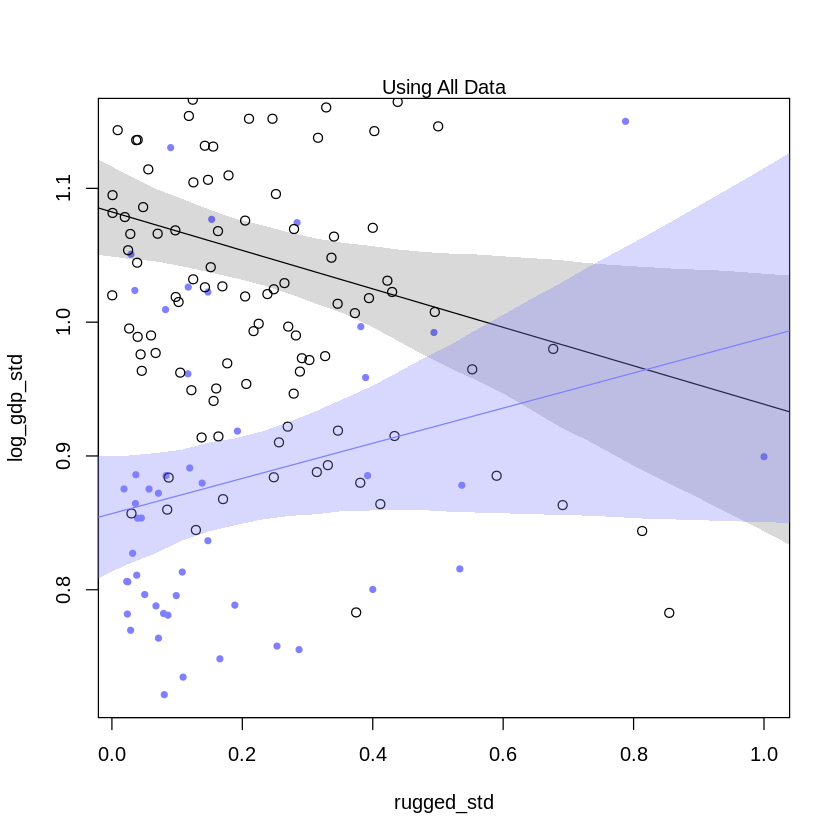

In [52]:
rugged.seq <- seq( from=-0.1 , to=1.1 , length.out=30 )

# compute mu over samples, fixing cid=2
mu.NotAfrica_all <- link( m_all , data=data.frame( cid=2 , rugged_std=rugged.seq ) )
# compute mu over samples, fixing cid=1
mu.Africa_all <- link( m_all , data=data.frame( cid=1 , rugged_std=rugged.seq ) )
# summarize to means and intervals
mu.NotAfrica_mu_all <- apply( mu.NotAfrica_all, 2 , mean )
mu.NotAfrica_ci_all <- apply( mu.NotAfrica_all, 2 , PI , prob=0.97 )
mu.Africa_mu_all <- apply( mu.Africa_all , 2 , mean )
mu.Africa_ci_all <- apply( mu.Africa_all , 2 , PI , prob=0.97 )

#split countries into Africa and not-Africa to display
dd.A1 <- dd[ dd$cid==1 , ] # Africa
dd.A2 <- dd[ dd$cid==2 , ] # not Africa

plot( log_gdp_std ~ rugged_std , data=dd.A1, pch = 20, col=col.alpha(rangi2,1) )
#plot( log_gdp_std ~ rugged_std , data=dd.A2 )
#points(g.delta ~ x, data = df, pch = 20, col = "red")
points( log_gdp_std ~ rugged_std, data = dd.A2)
lines( rugged.seq , mu.NotAfrica_mu_all )
shade( mu.NotAfrica_ci_all , rugged.seq )
lines( rugged.seq , mu.Africa_mu_all, col=col.alpha(rangi2,1) )
shade( mu.Africa_ci_all , rugged.seq, col=col.alpha(rangi2,0.3) )
mtext("Using All Data")

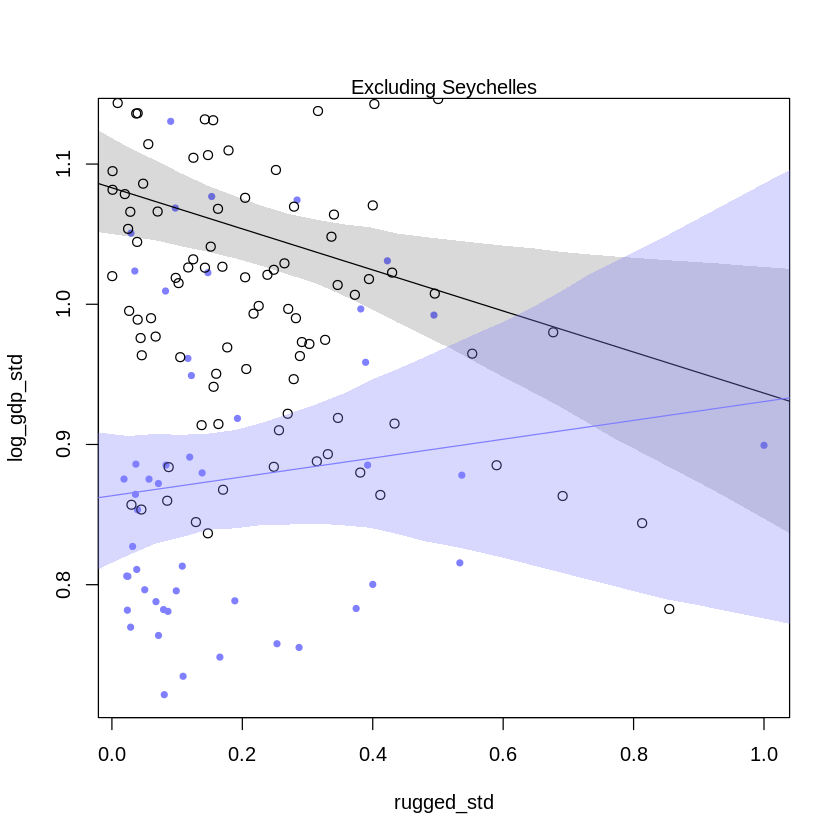

In [53]:
# compute mu over samples, fixing cid=2
mu.NotAfrica_noSey <- link( m_noSey , data=data.frame( cid=2 , rugged_std=rugged.seq ) )
# compute mu over samples, fixing cid=1
mu.Africa_noSey <- link( m_noSey , data=data.frame( cid=1 , rugged_std=rugged.seq ) )
# summarize to means and intervals
mu.NotAfrica_mu_noSey <- apply( mu.NotAfrica_noSey, 2 , mean )
mu.NotAfrica_ci_noSey <- apply( mu.NotAfrica_noSey, 2 , PI , prob=0.97 )
mu.Africa_mu_noSey <- apply( mu.Africa_noSey , 2 , mean )
mu.Africa_ci_noSey <- apply( mu.Africa_noSey , 2 , PI , prob=0.97 )

#split countries into Africa and not-Africa to display
dd_noSey.A1 <- dd[ dd_noSey$cid==1 , ] # Africa
dd_noSey.A2 <- dd[ dd_noSey$cid==2 , ] # not Africa

plot( log_gdp_std ~ rugged_std , data=dd_noSey.A1, pch = 20, col=col.alpha(rangi2,1) )
#plot( log_gdp_std ~ rugged_std , data=dd.A2 )
#points(g.delta ~ x, data = df, pch = 20, col = "red")
points( log_gdp_std ~ rugged_std, data = dd_noSey.A2)
lines( rugged.seq , mu.NotAfrica_mu_noSey )
shade( mu.NotAfrica_ci_noSey , rugged.seq )
lines( rugged.seq , mu.Africa_mu_noSey, col=col.alpha(rangi2,1) )
shade( mu.Africa_ci_noSey , rugged.seq, col=col.alpha(rangi2,0.3) )
mtext("Excluding Seychelles")

For the data excluding the Seychelles, whilst the bR has shifted lower and potentially negative (see the lower bounds of the shaded credible interval), still the mean (MAP) mu line for African countries is upward sloping with ruggedness.  This suggests that, even when removing the Seychelles, the other African countries tend to exhibit the positive relationship between GDP and ruggedness, contrary to non-African countries.

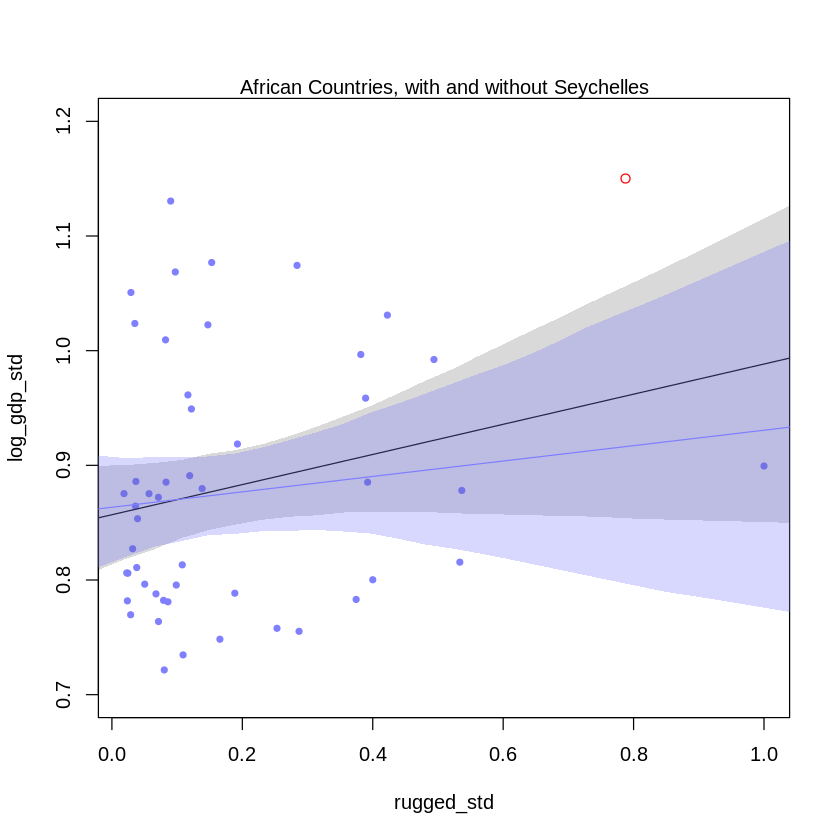

In [54]:
plot( log_gdp_std ~ rugged_std , data=dd_noSey.A1, pch = 20, col=col.alpha(rangi2,1), ylim=c(0.7, 1.2) )
lines( rugged.seq , mu.Africa_mu_all )
shade( mu.Africa_ci_all , rugged.seq )
lines( rugged.seq , mu.Africa_mu_noSey, col=col.alpha(rangi2,1) )
shade( mu.Africa_ci_noSey , rugged.seq, col=col.alpha(rangi2,0.3) )
points( log_gdp_std ~ rugged_std, data = dd.A1[which(dd.A1$country=='Seychelles'),], col="red")
mtext("African Countries, with and without Seychelles")

In [55]:
post_all <- extract.samples(m_all)
mean(post_all$bR[,1]>0)

post_noSey <- extract.samples(m_noSey)
mean(post_noSey$bR[,1]>0)


[1] 0.9593

[1] 0.788

With all data points, 96% of the distribution of bR[1] is greater than 0.  Without the Seychelles, only 79% of the distribution of bR[1] is greater than 0.  In this latter case, whilst reduced, bR[1] is still more likely to be positive.

In [56]:
m_1 <- quap(
            alist(
                log_gdp_std ~ dnorm(mu, sigma),
                mu <- a + bR * (rugged_std - mean(dd_noSey$rugged_std)),
                a ~ dnorm(1, 0.2),
                bR ~ dnorm(0,0.3),
                sigma ~ dexp(1)
            ),
            data=dd_noSey)

precis(m_1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.99911308,0.010477744,0.9823676,1.01585854
bR,-0.01261522,0.056271175,-0.1025474,0.07731699
sigma,0.13639798,0.007413266,0.1245502,0.14824582


In [57]:
m_2 <- quap(
            alist(
                log_gdp_std ~ dnorm(mu, sigma),
                mu <- a[cid] + bR * (rugged_std - mean(dd_noSey$rugged_std)),
                a[cid] ~ dnorm(1, 0.2),
                bR ~ dnorm(0,0.3),
                sigma ~ dexp(1)
            ),
            data=dd_noSey)

precis(m_2, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.87054006,0.015977272,0.8450053,0.896074825
a[2],1.05031203,0.010030298,1.0342817,1.066342387
bR,-0.08018195,0.046249719,-0.1540979,-0.006265971
sigma,0.11009282,0.005983321,0.1005303,0.119655321


In [58]:
m_3 <- quap(
            alist(
                log_gdp_std ~ dnorm(mu, sigma),
                mu <- a[cid] + bR[cid] * (rugged_std - mean(dd_noSey$rugged_std)),
                a[cid] ~ dnorm(1, 0.2),
                bR[cid] ~ dnorm(0,0.3),
                sigma ~ dexp(1)
            ),
            data=dd_noSey)

precis(m_3, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.87707268,0.016050091,0.85142153,0.90272382
a[2],1.05144825,0.009910118,1.03560996,1.06728653
bR[1],0.06501348,0.081044133,-0.06451070,0.19453766
bR[2],-0.14286593,0.054325159,-0.22968803,-0.05604383
sigma,0.10861508,0.005903058,0.09918085,0.11804930


In [59]:
compare(m_1, m_2, m_3)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_3,-260.9217,4.547884,0.000000,7.976284e-01,15.23147,NA
m_2,-258.1787,3.828310,2.743075,2.023716e-01,14.27165,3.744728
m_1,-187.8730,2.676700,73.048791,1.095109e-16,13.43551,15.769382


In [60]:
compare(m_1, m_2, m_3, func=LOO)

,LOO,pLOO,dLOO,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_3,-260.6529,4.700408,0.000000,7.723603e-01,15.29960,NA
m_2,-258.2095,3.806778,2.443374,2.276397e-01,14.39723,3.784003
m_1,-187.6074,2.821897,73.045499,1.062164e-16,13.45023,15.753615


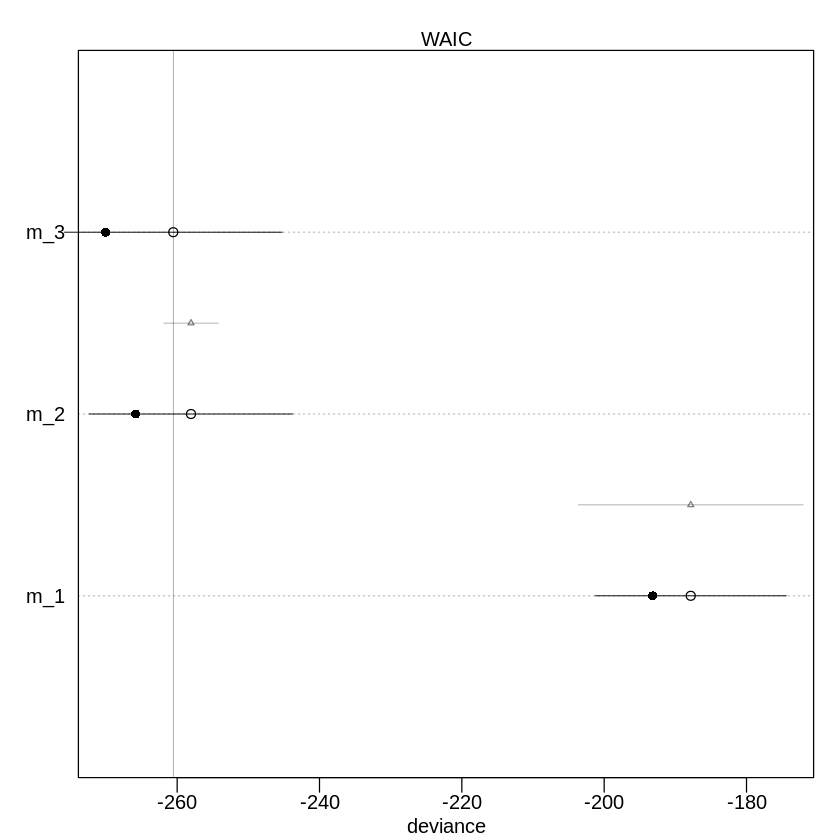

In [61]:
plot( compare( m_1, m_2, m_3 ))

The WAIC and LOO find it difficult to distinguish between m_2 and m_3, as dSE is larger than dWAIC or dLOO.  m_3 predicts the best, however it also has a higher effective parameters value pWAIC or pLOO, so is more prone to overfitting.  The weights are around 0.8 for m_3, just below 0.2 for m_2, and almost 0 for m_1, so clearly m_1 is a worse model (not surprising as it has a much lower effective parameters value pWAIC, and will not distinguish between African / Non-African countries).  Thus, our model comparison justifies splitting the data into African / Non-African countries, even without including the outlier of the Seychelles in the data.

In [62]:
rugged.seq <- seq( from=-0.1 , to=1.1 , length.out=30 )

m.ensemble_Africa <- ensemble( m_1, m_2, m_3 , data=list(rugged_std=rugged.seq, cid=1) )
mu.mean_Africa <- apply( m.ensemble_Africa$link , 2 , mean )
mu.ci_Africa <- apply( m.ensemble_Africa$link , 2 , PI, prob=0.97 )
log_gdp_std.ci_Africa <- apply( m.ensemble_Africa$sim , 2 , PI, prob=0.97 )

m.ensemble_NotAfrica <- ensemble( m_1, m_2, m_3 , data=list(rugged_std=rugged.seq, cid=2) )
mu.mean_NotAfrica <- apply( m.ensemble_NotAfrica$link , 2 , mean )
mu.ci_NotAfrica <- apply( m.ensemble_NotAfrica$link , 2 , PI, prob=0.97 )
log_gdp_std.ci_NotAfrica <- apply( m.ensemble_NotAfrica$sim , 2 , PI, prob=0.97 )



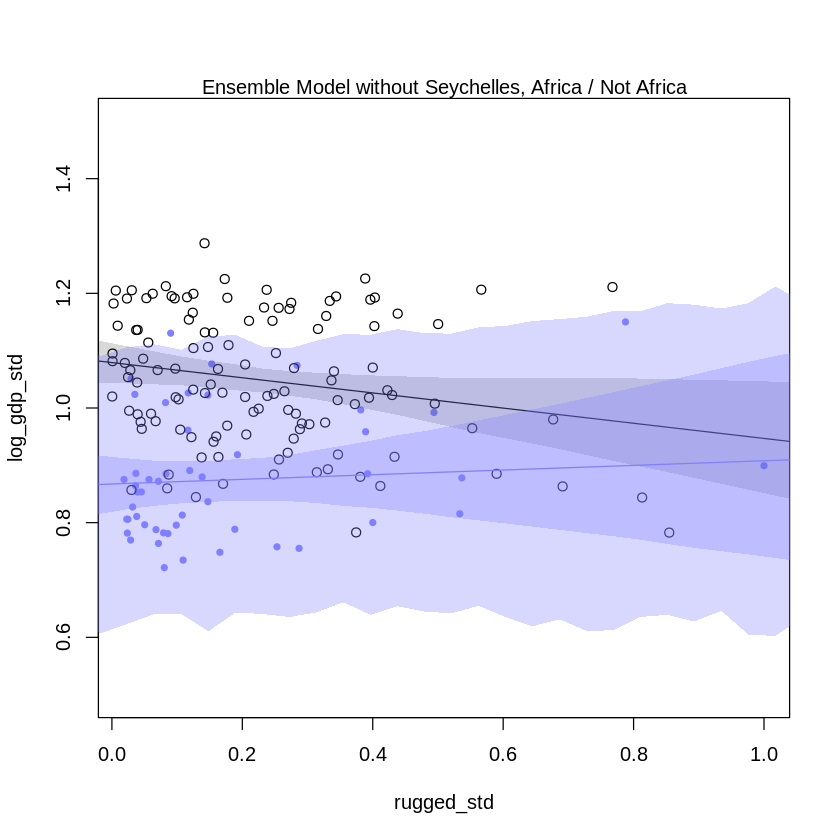

In [63]:
plot( log_gdp_std ~ rugged_std , data=dd.A1, pch = 20, col=col.alpha(rangi2,1), ylim=c(0.5, 1.5) )
points( log_gdp_std ~ rugged_std, data = dd.A2)
lines( rugged.seq , mu.mean_NotAfrica )
shade( mu.ci_NotAfrica , rugged.seq )
#shade( log_gdp_std.ci_NotAfrica , rugged.seq )
lines( rugged.seq , mu.mean_Africa, col=col.alpha(rangi2,1) )
shade( mu.ci_Africa , rugged.seq, col=col.alpha(rangi2,0.3) )
shade( log_gdp_std.ci_Africa , rugged.seq, col=col.alpha(rangi2,0.3) )
mtext("Ensemble Model without Seychelles, Africa / Not Africa")

The model preditions don't change much from (b), because 80% of the ensemble model is the same.  The uncertainty of mu (and probably also the simulated log_gdp_std) is bigger though, so the shaded area is wider, expressing a greater possibility of existing a negative relationship between log_gdp and ruggedness.

7H4

In [64]:
library(rethinking)
data(nettle)
d <- nettle

In [65]:
d$log_lang.per.cap_std <- standardize(log(d$num.lang / d$k.pop))
d$log_area_std <- standardize(log(d$area))
d$mgs_std <- standardize(d$mean.growing.season)
d$sdgs_std <- standardize(d$sd.growing.season)

head(d)

country,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season,log_lang.per.cap_std,log_area_std,mgs_std,sdgs_std
<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,18,2381741,25660,102,6.60,2.29,-1.18738489,1.3739420,-0.14042882,0.5541896
Angola,42,1246700,10303,50,6.22,1.87,-0.03019219,0.8652598,-0.26129990,0.1602231
Australia,234,7713364,17336,134,6.00,4.17,0.75711970,2.2973697,-0.33127790,2.3176583
Bangladesh,37,143998,118745,20,7.40,0.73,-1.72100383,-0.8308847,0.11403663,-0.9091143
Benin,52,112622,4889,7,7.14,0.99,0.60043349,-1.0240081,0.03133536,-0.6652303
Bolivia,38,1098581,7612,48,6.92,2.50,0.10304881,0.7658696,-0.03864264,0.7511728


Priors:  Standardized variables generally within range of -2 to 2.  Therefore use priors with sd = 1.  As, a priori, we do not know of the direction of any such association, the priors should have mean 0.

A suitable DAG might be:
Area -> Lang Per Cap

and

Area -> Mean Growing Season -> Lang Per Cap

because the bigger the area, the higher the probability that some parts of it will be in a growing season, so that, taken on a nationwide level, growing season will be longer.  Therefore area can influence mean growing season.  Thus area could be a shared influence, confounding the association between mgs and lang per cap, hence it is right that we should control for area.

In [66]:
m7H4a <- quap(
            alist(
                log_lang.per.cap_std ~ dnorm(mu, sigma),
                mu <- a + bA * log_area_std + bMGS * mgs_std,
                a ~ dnorm(0, 0.2),
                bA ~ dnorm(0, 0.3),
                bMGS ~ dnorm(0, 0.3),
                sigma ~ dexp(1)
            ),
            data = d)

precis(m7H4a)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-9.527433e-06,0.09340247,-0.14928472,0.149265666
bA,-1.599035e-01,0.10611788,-0.32950037,0.009693357
bMGS,2.670208e-01,0.10619801,0.09729583,0.436745693
sigma,9.086545e-01,0.07410644,0.79021810,1.027090925


This does support the hypothesis that language diversity is positively associated with the mean growing season, as there appears to be a positive association between log languages per capita and mean growing season.  There is a weakly negative association between log lang p cap and log area.

Check the priors:

Warning message in min(dd$log_lang.per.cap_std):
“no non-missing arguments to min; returning Inf”Warning message in max(dd$log_lang.per.cap_std):
“no non-missing arguments to max; returning -Inf”

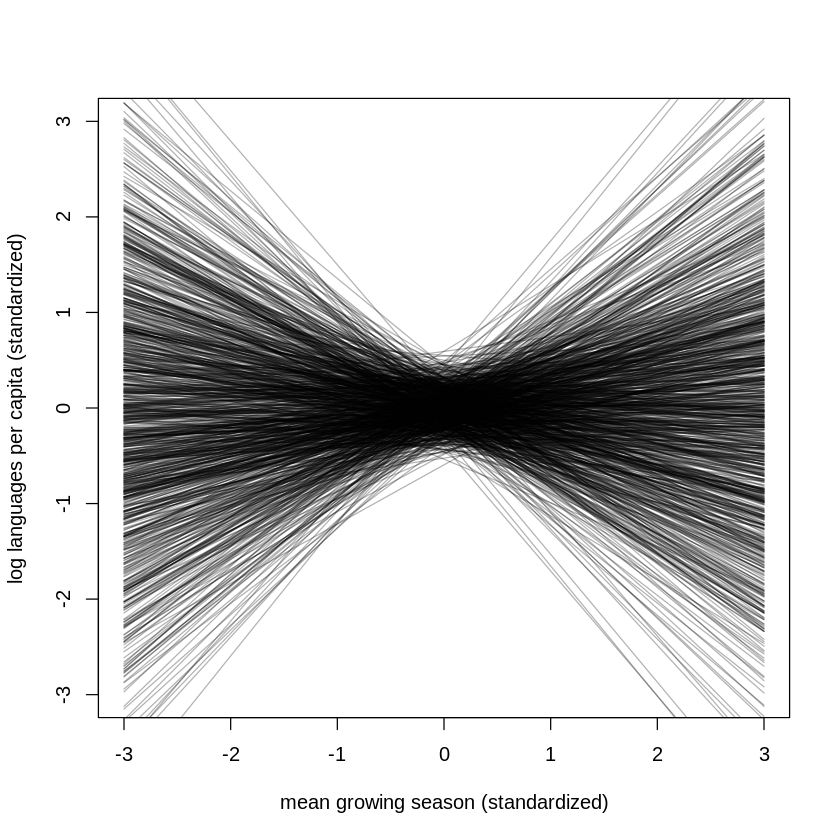

In [67]:
set.seed(7)
prior <- extract.prior( m7H4a )
# set up the plot dimensions
plot( NULL , xlim=c(-3,3) , ylim=c(-3,3) ,
xlab="mean growing season (standardized)" , ylab="log languages per capita (standardized)" )
abline( h=min(dd$log_lang.per.cap_std) , lty=2 )
abline( h=max(dd$log_lang.per.cap_std) , lty=2 )
# draw 50 lines from the prior
seq <- seq( from=-3 , to=3 , length.out=30 )
mu <- link( m7H4a , post=prior , data=data.frame(mgs_std=seq, log_area_std=seq) )
for ( i in 1:1000 ) lines( seq , mu[i,] , col=col.alpha("black",0.3) )

The standardized mean growing season data must mostly lie between -2 and 2.  I think it plausible that there may exist countries of similar mean growing seasons, but with different orders of magnitude of languages per capita, so I am happy to keep priors with steep gradients in the plot above, i.e. high assocaition between log languages per cap (std) and mean growing season (std).  We have 74 data points, so hopefully this will be enough samples so that the priors do not matter much.  I could iteratively try to minimise the priors to check whether they make a difference, but that would run the risk of 'data hacking' by using data that I shouldn't know already.

OK, I admit it.  I started off with priors of sd=1, but then checked whether sd=0.3 made any difference to the estimates, which it didn't (at least in this model).

In [68]:
m7H4b <- quap(
            alist(
                log_lang.per.cap_std ~ dnorm(mu, sigma),
                mu <- a + bA * log_area_std + bSDGS * sdgs_std,
                a ~ dnorm(0, 0.2),
                bA ~ dnorm(0, 0.3),
                bSDGS ~ dnorm(0, 0.3),
                sigma ~ dexp(1)     
            ),
            data = d)

precis(m7H4b)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-5.801986e-08,0.09591414,-0.1532894,0.153289264
bA,-1.805244e-01,0.11700962,-0.3675283,0.006479602
bSDGS,-1.386873e-01,0.11698229,-0.3256476,0.048272941
sigma,9.402639e-01,0.07661155,0.8178239,1.062703969


There appears to be a weakly negative association of lang per cap with sd of growing season, although some of the distribution of the relevant coefficient is around 0 or positive.  The distribution of the coefficient for log area (bA) is very similar to the one observed in a.

In [69]:
m7H4c_no <- quap(
            alist(
                log_lang.per.cap_std ~ dnorm(mu, sigma),
                mu <- a + bA * log_area_std + bMGS * mgs_std + bSDGS * sdgs_std,
                a ~ dnorm(0, 0.2),
                bA ~ dnorm(0, 0.3),
                bMGS ~ dnorm(0, 0.3),
                bSDGS ~ dnorm(0, 0.3),
                sigma ~ dexp(1)     
            ),
            data = d)

precis(m7H4c_no)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,7.121064e-07,0.09156888,-0.1463440,0.14634547
bA,-4.691681e-02,0.12078191,-0.2399496,0.14611600
bMGS,3.097827e-01,0.10645050,0.1396542,0.47991113
bSDGS,-2.099591e-01,0.11412287,-0.3923495,-0.02756874
sigma,8.860255e-01,0.07239192,0.7703292,1.00172172


This is a main effects model with no interaction term.  The coefficients are reasonably similar to the previous models where mean and sd of growing season were treated separately.  Note though that the coefficient for area has become much closer to zero and so may not be significant.  Similar to what was discussed before, a plausible DAG may include a path:

Area -> SDGS -> Lang Per Cap

in that countries with larger areas may have a smaller standard deviation of growing season, as they may contain a greater variety of weather and crops that can be grown. 

This doesn't show up when only one of MGS or SDGS are included, but perhaps their combined inclusion has a greater impact on conditioning away the influence of area.

In [70]:
m7H4c_int <- quap(
            alist(
                log_lang.per.cap_std ~ dnorm(mu, sigma),
                mu <- a + bA * log_area_std + bMGS * mgs_std + bSDGS * sdgs_std + bInt * mgs_std * sdgs_std,
                a ~ dnorm(0, 0.2),
                bA ~ dnorm(0, 0.3),
                bMGS ~ dnorm(0, 0.3),
                bSDGS ~ dnorm(0, 0.3),
                bInt ~ dnorm(0, 0.3),
                sigma ~ dexp(1)     
            ),
            data = d)

precis(m7H4c_int)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00384807,0.08904358,-0.13846078,0.14615692
bA,-0.03445503,0.11753273,-0.22229503,0.15338498
bMGS,0.20698098,0.11244427,0.02727333,0.38668864
bSDGS,-0.20090881,0.11096252,-0.37824834,-0.02356928
bInt,-0.22765855,0.09639378,-0.38171443,-0.07360267
sigma,0.85526193,0.06983153,0.74365767,0.96686620


The coefficients are quite stable on adding the interaction term.  The bMGS has been reduced by adding the interaction term.  The coefficient on the interaction term (bInt) is negative and of a similar order of magnitude to both bMGS and bSDGS.

In [71]:
compare(m7H4a, m7H4b, m7H4c_no, m7H4c_int)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m7H4c_int,200.0044,6.145143,0.000000,0.804478618,16.51160,NA
m7H4c_no,203.5618,5.473468,3.557400,0.135842255,16.15280,4.438372
m7H4a,205.3414,4.548132,5.337034,0.055794620,16.17369,5.067883
m7H4b,210.6708,4.770171,10.666396,0.003884508,17.14110,6.104043


In [72]:
compare(m7H4a, m7H4b, m7H4c_no, m7H4c_int, func=LOO)

Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”Warning message in xcheckLOOk(loo_list$diagnostics$pareto_k, object_name):
“Some Pareto k diagnostics are high (>0.5) in z.”

,LOO,pLOO,dLOO,weight,SE,dSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m7H4c_int,200.4783,6.452359,0.000000,0.826976653,16.80156,NA
m7H4c_no,204.3230,5.859277,3.844794,0.120950252,16.62159,4.477447
m7H4a,206.1341,4.967242,5.655844,0.048903763,16.54046,5.205714
m7H4b,211.6068,5.241275,11.128511,0.003169333,17.72754,6.194110


The best predictive model is the one that includes the interaction term.  This model has more parameters though, and the standard error of the difference between models that include the mean growing season (c_int, c_no and a) are larger than the differnces in WAIC or LOO values, so cannot be significantly distinguished.  From this outperformance compared to the model that doesn't include the mean but the standard deviation of growing season, we can conclude that the mean growing season is relatively important as a predictor of language per capita.

In [73]:
coeftab(m7H4a, m7H4b, m7H4c_no, m7H4c_int)

      m7H4a   m7H4b   m7H4c_no m7H4c_int
a           0       0       0        0  
bA      -0.16   -0.18   -0.05    -0.03  
bMGS     0.27      NA    0.31     0.21  
sigma    0.91    0.94    0.89     0.86  
bSDGS      NA   -0.14   -0.21    -0.20  
bInt       NA      NA      NA    -0.23  
nobs       74      74      74       74  

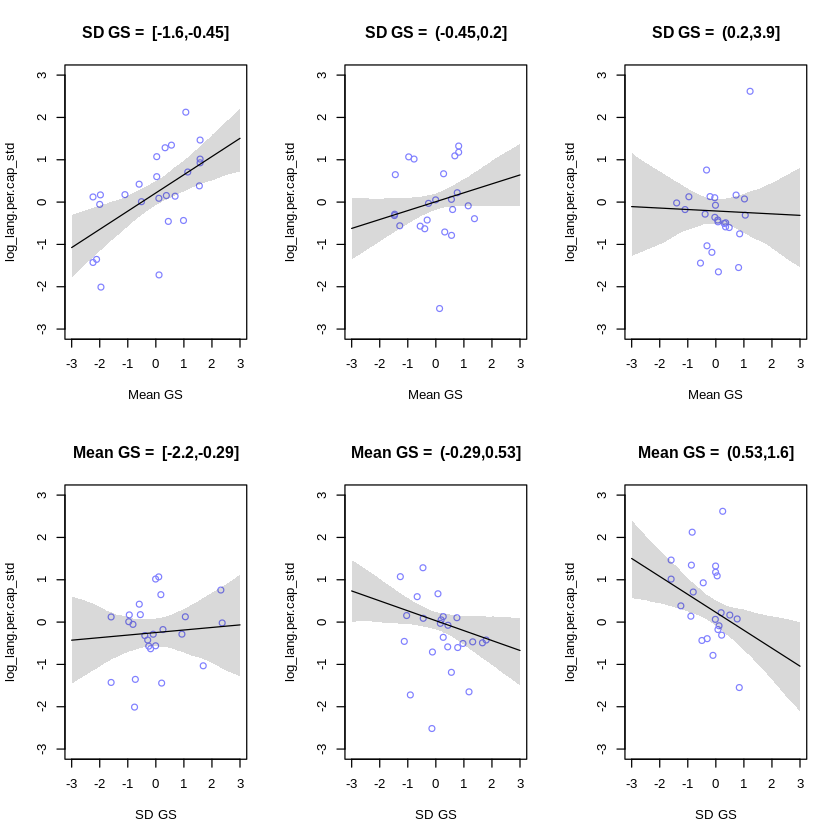

In [74]:
par(mfrow = c(2, 3))
# Discretize variables into groups
d$mgs_std.group <- cut(
  d$mgs_std, 
  breaks = quantile(d$mgs_std, probs = c(0, 1/3, 2/3, 1)),
  include.lowest = TRUE, 
  dig.lab = 2
)
d$sdgs_std.group <- cut(
  d$sdgs_std, 
  breaks = quantile(d$sdgs_std, probs = c(0, 1/3, 2/3, 1)),
  include.lowest = TRUE, 
  dig.lab = 2
)

# Plot first row as mean against SD
mgs_std.seq <- seq(from = -3, to = 3, length.out = 50)
for (group in levels(d$sdgs_std.group)) {
  dt <- d[d$sdgs_std.group == group, ]
  plot(log_lang.per.cap_std ~ mgs_std, data = dt, col = rangi2, xlim = c(-3, 3), ylim = c(-3, 3),
    main = paste("SD GS = ", group), xlab = "Mean GS")
  mu <- link(m7H4c_int, data = data.frame(log_area_std = mean(dt$log_area_std), mgs_std = mgs_std.seq, sdgs_std = mean(dt$sdgs_std)),
    refresh = 0)
  mu.mean <- apply(mu, 2, mean)
  mu.PI <- apply(mu, 2, PI, prob = 0.97)
  lines(mgs_std.seq, mu.mean)
  shade(mu.PI, mgs_std.seq)
#  lines(mgs_std.seq, mu.PI[1, ], lty = 2)
#  lines(mgs_std.seq, mu.PI[2, ], lty = 2)
}
# Plot second row as SD against mean
sdgs_std.seq <- seq(from = -3, to = 3, length.out = 50)
for (group in levels(d$mgs_std.group)) {
  dt <- d[d$mgs_std.group == group, ]
  plot(log_lang.per.cap_std ~ sdgs_std, data = dt, col = rangi2, xlim = c(-3, 3), ylim = c(-3, 3),
    main = paste("Mean GS = ", group), xlab = "SD GS")
  mu <- link(m7H4c_int, data = data.frame(log_area_std = mean(dt$log_area_std), sdgs_std = sdgs_std.seq, mgs_std = mean(dt$mgs_std)),
    refresh = 0)
  mu.mean <- apply(mu, 2, mean)
  mu.PI <- apply(mu, 2, PI, prob = 0.97)
  lines(sdgs_std.seq, mu.mean)
  shade(mu.PI, sdgs_std.seq)
#  lines(sdgs_std.seq, mu.PI[1, ], lty = 2)
#  lines(sdgs_std.seq, mu.PI[2, ], lty = 2)
}

From https://jmgirard.com/statistical-rethinking-ch7/:

"These plots show that the association between mean length of growing season and language diversity is positive when SD length of growing season is low, but is basically zero when SD length of growing season is high. Similarly, the association between SD length of growing season and language diversity is basically zero when mean length of growing season is low, but is negative when mean length of growing season is high. This is consistent with the hypothesis presented in the question."

Our results agree with this assessment.